IMPORTACION DE LIBRERIAS Y CARGA DE DATOS

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier



In [ ]:
try:
    df = pd.read_csv('./data/transactions.csv')
    print("Dataset 'transactions.csv' cargado exitosamente.")
    print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print("Error: El archivo 'transactions.csv' no se encontró. Asegúrate de que esté en el mismo directorio.")
    exit()

Dataset 'transactions.csv' cargado exitosamente.
El dataset tiene 199999 filas y 10 columnas.


In [31]:
print("\nPrimeras 5 filas del dataset:")
print(df.head())



Primeras 5 filas del dataset:
   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     8  CASH_OUT  158007.12   C424875646           0.00            0.00   
1   236  CASH_OUT  457948.30  C1342616552           0.00            0.00   
2    37   CASH_IN  153602.99   C900876541    11160428.67     11314031.67   
3   331  CASH_OUT   49555.14   C177696810       10865.00            0.00   
4   250  CASH_OUT   29648.02   C788941490           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  C1298177219       474016.32      1618631.97        0  
1  C1323169990      2720411.37      3178359.67        0  
2   C608741097      3274930.56      3121327.56        0  
3   C462716348            0.00        49555.14        0  
4  C1971700992        56933.09        86581.10        0  


In [32]:
print("\nInformación general y tipos de datos:")
df.info()


Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            199999 non-null  int64  
 1   type            199999 non-null  object 
 2   amount          199999 non-null  float64
 3   nameOrig        199999 non-null  object 
 4   oldbalanceOrg   199999 non-null  float64
 5   newbalanceOrig  199999 non-null  float64
 6   nameDest        199999 non-null  object 
 7   oldbalanceDest  199999 non-null  float64
 8   newbalanceDest  199999 non-null  float64
 9   isFraud         199999 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 15.3+ MB


In [33]:
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [34]:
# Creamos la columna 'day_hour' que representa la hora del día en la que se realizó la transacción formato 0-23 (24h format)
df['day_hour'] = df['step'] % 24

In [35]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,day_hour
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0,8
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0,20
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0,13
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0,19
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0,10


In [36]:
print("\nEstadísticas descriptivas básicas:")
print(df.describe())


Estadísticas descriptivas básicas:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  199999.000000  1.999990e+05   1.999990e+05    1.999990e+05   
mean      243.289836  1.802425e+05   8.314361e+05    8.523333e+05   
std       141.800473  6.255482e+05   2.882314e+06    2.917352e+06   
min         1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%       156.000000  1.338746e+04   0.000000e+00    0.000000e+00   
50%       238.000000  7.426695e+04   1.420100e+04    0.000000e+00   
75%       334.000000  2.086376e+05   1.078489e+05    1.449629e+05   
max       741.000000  5.204280e+07   5.039905e+07    4.039905e+07   

       oldbalanceDest  newbalanceDest        isFraud       day_hour  
count    1.999990e+05    1.999990e+05  199999.000000  199999.000000  
mean     1.093644e+06    1.218886e+06       0.001410      15.318457  
std      3.302878e+06    3.627192e+06       0.037524       4.317347  
min      0.000000e+00    0.000000e+00       0.000000       0.0

Análisis Exploratorio de Datos (EDA)


Iniciando Análisis Exploratorio de Datos (EDA)...


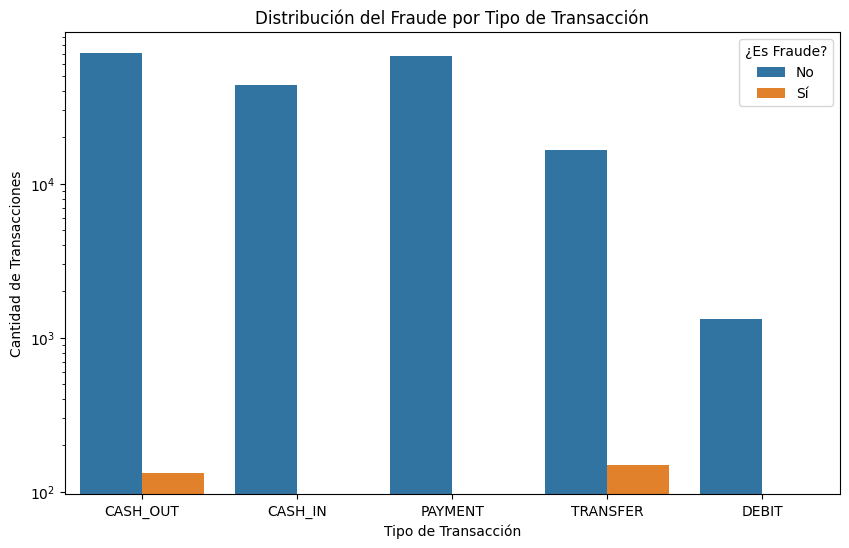

In [37]:
print("\nIniciando Análisis Exploratorio de Datos (EDA)...")

# Gráfico 1: Distribución del Fraude por Tipo de Transacción
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, hue='isFraud')
plt.title('Distribución del Fraude por Tipo de Transacción')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.yscale('log') # Usamos escala logarítmica para ver mejor las barras de fraude
plt.legend(title='¿Es Fraude?', labels=['No', 'Sí'])
plt.show()

In [38]:
df_fraud = df[df['isFraud'] == 1]
print(f"\nTipos de transacción donde SÍ ocurre fraude:")
print(df_fraud['type'].value_counts())


Tipos de transacción donde SÍ ocurre fraude:
type
TRANSFER    150
CASH_OUT    132
Name: count, dtype: int64


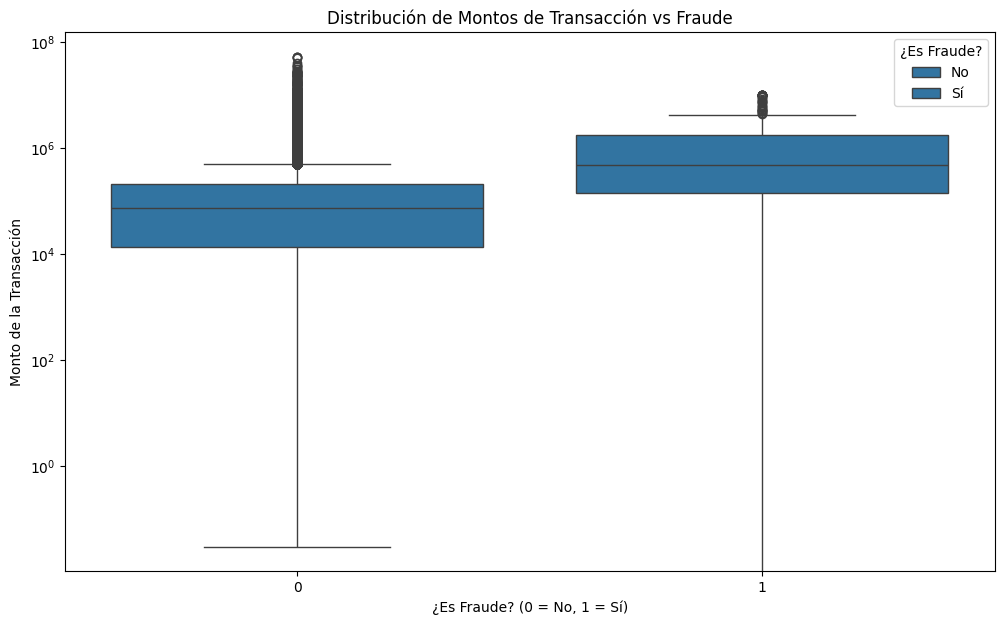

In [39]:
# Gráfico 2: Comparación de montos entre transacciones legítimas y fraudulentas
plt.figure(figsize=(12, 7))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribución de Montos de Transacción vs Fraude')
plt.xlabel('¿Es Fraude? (0 = No, 1 = Sí)')
plt.ylabel('Monto de la Transacción')
plt.yscale('log') # Escala logarítmica para manejar los outliers visualmente
plt.legend(title='¿Es Fraude?', labels=['No', 'Sí'])
plt.show()

Ingeniería de Características y Preprocesamiento

In [40]:
print("\nIniciando Ingeniería y Preprocesamiento de Características...")

# Hacemos una copia para mantener el DataFrame original intacto
df_model = df.copy()


Iniciando Ingeniería y Preprocesamiento de Características...


In [ ]:
# Columna 1: Marcar si el tipo es 'TRANSFER' o 'CASH_OUT'
df_model['esTipoRelevante'] = np.where(df_model['type'].isin(['TRANSFER', 'CASH_OUT']), 1, 0)

In [ ]:
# Columna 2: Capturar el patrón de vaciado de cuenta
df_model['intentoVaciado'] = np.where((df_model['oldbalanceOrg'] > 0) & (df_model['amount'] == df_model['oldbalanceOrg']), 1, 0)

In [ ]:
# Columna 3: Error en el balance del originador después de la transacción
df_model['errorBalanceOrig'] = df_model['oldbalanceOrg'] + df_model['amount'] - df_model['newbalanceOrig']


In [44]:
# Preprocesamiento: Codificación de la variable 'type' (One-Hot Encoding)
# Esto convierte la columna 'type' en varias columnas binarias (ej. type_CASH_IN, type_CASH_OUT)
df_model = pd.get_dummies(df_model, columns=['type'], prefix='type', drop_first=True)

In [45]:
print("Nuevas características creadas: 'esTipoRelevante', 'intentoVaciado', 'errorBalanceOrig'")
print("Variable 'type' codificada con One-Hot Encoding.")
print("\nColumnas del nuevo DataFrame listo para el modelo:")
print(df_model.columns)

Nuevas características creadas: 'esTipoRelevante', 'intentoVaciado', 'errorBalanceOrig'
Variable 'type' codificada con One-Hot Encoding.

Columnas del nuevo DataFrame listo para el modelo:
Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'day_hour',
       'esTipoRelevante', 'intentoVaciado', 'errorBalanceOrig',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


Preparación Final para el Modelo

In [46]:
# Definir la variable objetivo (lo que queremos predecir)
y = df_model['isFraud']

# Seleccionar las características (features) para el modelo
# Eliminamos la variable objetivo y los identificadores que no aportan valor
X = df_model.drop(columns=['isFraud', 'nameOrig', 'nameDest'])

print(f"\nNúmero total de características (features) para el modelo: {X.shape[1]}")



Número total de características (features) para el modelo: 14


In [47]:
# División de datos: 80% para entrenamiento, 20% para prueba
# 'stratify=y' es VITAL para problemas desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42, # Para reproducibilidad
    stratify=y
)

print(f"Tamaño del conjunto de entrenamiento (train): {len(X_train)} filas")
print(f"Tamaño del conjunto de prueba (test): {len(X_test)} filas")
print(f"Proporción de fraude en y_train: {y_train.mean():.4f}")
print(f"Proporción de fraude en y_test:  {y_test.mean():.4f}")

Tamaño del conjunto de entrenamiento (train): 159999 filas
Tamaño del conjunto de prueba (test): 40000 filas
Proporción de fraude en y_train: 0.0014
Proporción de fraude en y_test:  0.0014


 Modelo 1 - Árbol de Decisión

In [48]:
print("\n--- Entrenando Modelo: Árbol de Decisión ---")
# `class_weight='balanced'` ayuda a manejar el desbalance de clases
# `max_depth` controla la complejidad del árbol para evitar que memorice los datos (overfitting)
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)


--- Entrenando Modelo: Árbol de Decisión ---


,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [49]:
# Realizar predicciones en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

print("\n--- Resultados del Árbol de Decisión ---")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt, target_names=['No Fraude', 'Fraude']))

print(f"Área Bajo la Curva ROC (AUC): {roc_auc_score(y_test, y_pred_dt):.4f}")


--- Resultados del Árbol de Decisión ---
Matriz de Confusión:
[[39944     0]
 [    0    56]]

Reporte de Clasificación:
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     39944
      Fraude       1.00      1.00      1.00        56

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Área Bajo la Curva ROC (AUC): 1.0000


Modelo 2 - Random Forest 

In [50]:
print("\n--- Entrenando Modelo: Random Forest ---")
# `n_estimators` es el número de árboles en el bosque.
# `n_jobs=-1` utiliza todos los núcleos del procesador para acelerar el entrenamiento.
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


--- Entrenando Modelo: Random Forest ---


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred_rf = rf_model.predict(X_test)

print("\n--- Resultados del Random Forest ---")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['No Fraude', 'Fraude']))

print(f"Área Bajo la Curva ROC (AUC): {roc_auc_score(y_test, y_pred_rf):.4f}")


--- Resultados del Random Forest ---
Matriz de Confusión:
[[39944     0]
 [    0    56]]

Reporte de Clasificación:
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     39944
      Fraude       1.00      1.00      1.00        56

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Área Bajo la Curva ROC (AUC): 1.0000


Análisis de Resultados - Importancia de Características


--- Analizando Importancia de Características (desde Random Forest) ---
Top 10 características más importantes:
            feature  importance
0    intentoVaciado    0.424877
1  errorBalanceOrig    0.125252
2   esTipoRelevante    0.106991
3     oldbalanceOrg    0.086075
4            amount    0.072180
5          day_hour    0.031155
6    newbalanceOrig    0.027840
7     type_TRANSFER    0.027729
8    newbalanceDest    0.026175
9              step    0.023548


C:\Users\ALIEMWARE\AppData\Local\Temp\ipykernel_39052\90440206.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')


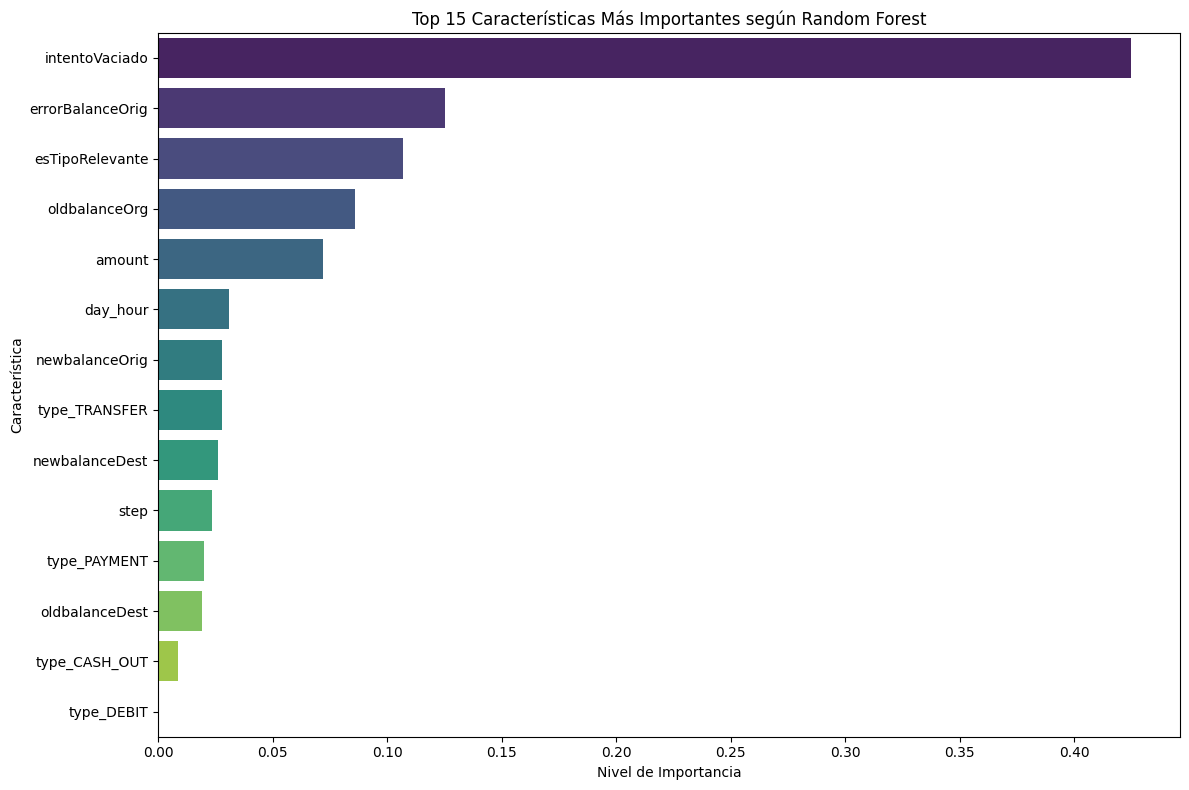


Proceso de análisis y modelado completado.


In [52]:
print("\n--- Analizando Importancia de Características (desde Random Forest) ---")

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("Top 10 características más importantes:")
print(feature_importances.head(10))

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
plt.title('Top 15 Características Más Importantes según Random Forest')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

print("\nProceso de análisis y modelado completado.")

In [53]:
import joblib

# Guardar el modelo Random Forest
joblib.dump(rf_model, 'fraud_model.joblib')
print("\nModelo Random Forest guardado como 'fraud_model.joblib'")

# Guardar la lista de columnas que el modelo espera
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.joblib')
print("Columnas del modelo guardadas como 'model_columns.joblib'")


Modelo Random Forest guardado como 'fraud_model.joblib'
Columnas del modelo guardadas como 'model_columns.joblib'
